In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36


In [13]:
# get a test file

fileIn = "Discharge_4.h5"

In [14]:
BDF= BeadDataFile.BeadDataFile(fileIn)

In [152]:
data=BDF.spin_data[0]
data_det = signal.detrend(data)
fsamp=len(data)/10
res = int(len(data)/10)
spinPSD4, freqs4 = matplotlib.mlab.psd(data_det, Fs = fsamp, NFFT = res)


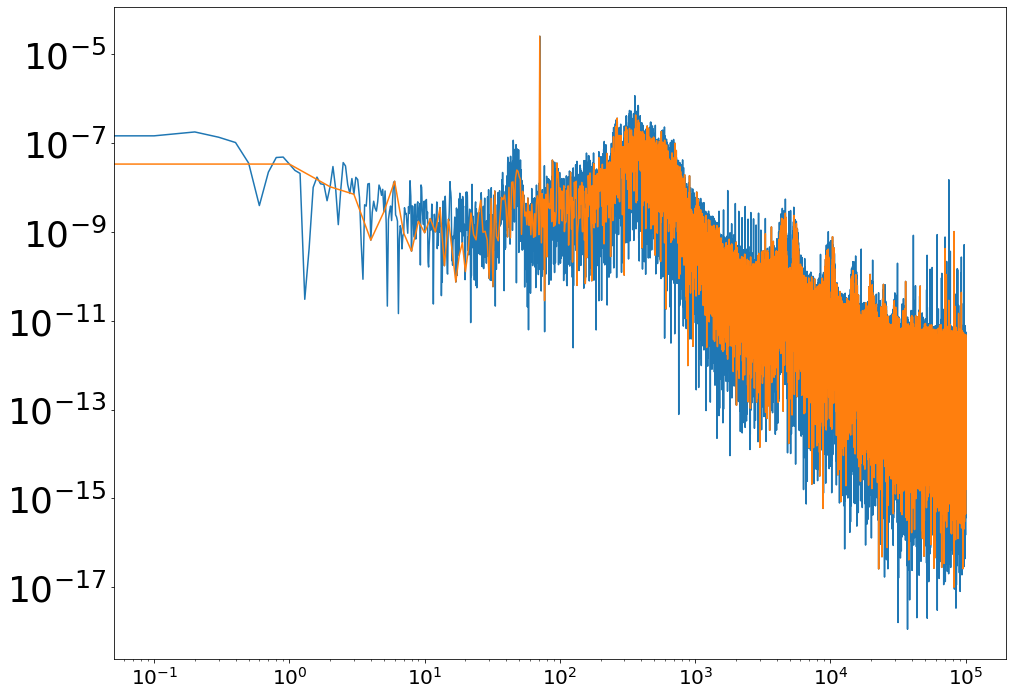

In [168]:
plt.loglog(freqs,spinPSD)
plt.loglog(freqs[::10],spinPSD[::10])
#plt.xlim(60,80)

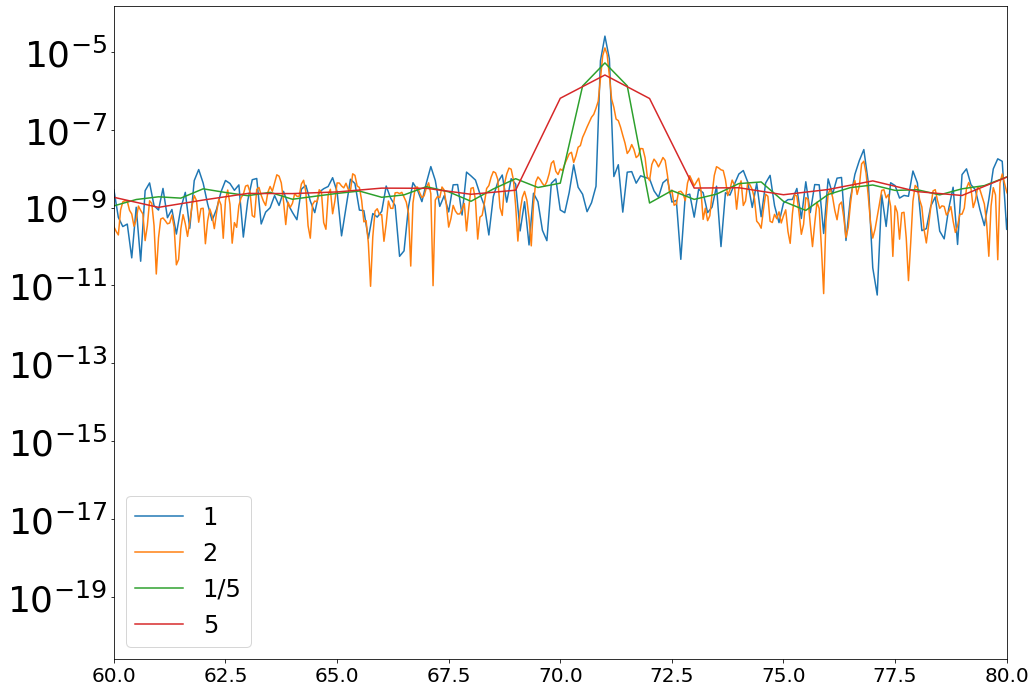

In [153]:
plt.plot(freqs,spinPSD, label='1')
plt.plot(freqs2,spinPSD2, label='2')
plt.plot(freqs3,spinPSD3,label='1/5')
plt.plot(freqs4,spinPSD4,label='5')
plt.yscale("log")
plt.xlim(60,80)
plt.legend()
plt.show()

In [121]:
totalspinPSD=np.array([spinPSD,spinPSD])

In [122]:
fileInNew="Discharge_4_new2.h5"
!h5repack "Discharge_4.h5" $fileInNew

In [123]:
sizeBefore = os.stat(fileInNew).st_size
print(sizeBefore)

6004200


In [124]:
#with h5py.File(fileIn, 'r') as f_in:
#    spin_data_in = np.array(f_in['spin_data'])
#    data_in = spin_data_in[0] 
#    f_in.close()
with h5py.File(fileInNew, 'r+') as f_out:
    #del f_out["spin_data"]
    f_out.create_dataset("spin_data", totalspinPSD.shape,data=totalspinPSD)
    f_out.close()

In [125]:
sizeAfter = os.stat("Discharge_4_new2.h5").st_size
print(sizeAfter)

7606264
